https://www.geeksforgeeks.org/linear-regression-using-tensorflow/

In [0]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from datetime import datetime

#https://www.datacamp.com/community/tutorials/tensorflow-tutorial

In [0]:
np.random.seed(101) 
tf.set_random_seed(101) 

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [0]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 30, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-2, 2, 50) 
  
n = len(x) # Number of data points 

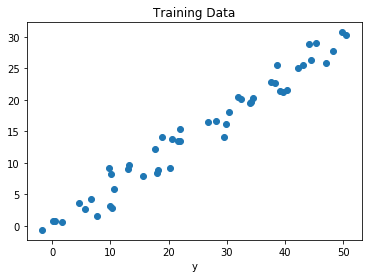

In [5]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [0]:
tf.reset_default_graph()

X = tf.placeholder("float") 
Y = tf.placeholder("float") 

logdir = log_dir("logreg")

In [0]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

In [0]:
learning_rate = 0.01
training_epochs = 1000

In [0]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b)   # y = (x*w) + b
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

# saver
saver = tf.train.Saver()

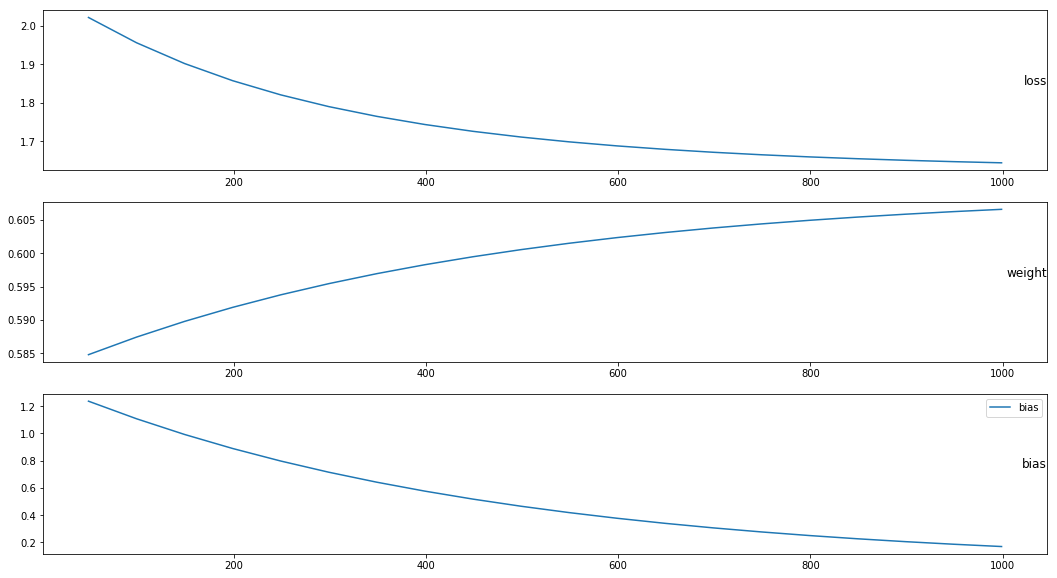

In [17]:
from IPython.display import clear_output
from matplotlib import pyplot as plt

# Starting the Tensorflow Session 
with tf.Session() as sess: 
	file_writer = tf.summary.FileWriter(logdir, sess.graph)

	# Initializing the Variables 
	sess.run(init)
  
	elapsed_epochs= []
	elapsed_cost = []
	elapsed_weight = []
	elapsed_bias = []
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			#print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =",sess.run(b) ) 
			
			weight = sess.run(W) 
			bias = sess.run(b) 

			elapsed_epochs.append(epoch)
			elapsed_cost.append(c)
			elapsed_weight.append(weight)
			elapsed_bias.append(bias)
			clear_output(wait=True)
			plt.figure(figsize=(18,10))
			plt.subplot(3, 1, 1)
			plt.plot(elapsed_epochs, elapsed_cost, label="loss")
			plt.title("loss",y=0.5, loc='right')
			plt.subplot(3, 1, 2)
			plt.plot(elapsed_epochs, elapsed_weight, label="weight")
			plt.title("weight",y=0.5, loc='right')
			plt.subplot(3, 1, 3)
			plt.plot(elapsed_epochs, elapsed_bias, label="bias")
			plt.title("bias",y=0.5, loc='right')
			plt.legend()
			plt.show();	
			
			c = tf.Summary(value=[tf.Summary.Value(tag="c", simple_value=c)]) #	https://stackoverflow.com/questions/53217596/tensorflow-attributeerror-numpy-float32-object-has-no-attribute-value		
			weight = tf.Summary(value=[tf.Summary.Value(tag="weight", simple_value=weight)])
			bias = tf.Summary(value=[tf.Summary.Value(tag="bias", simple_value=bias)])
			file_writer.add_summary(c, epoch)
			file_writer.add_summary(weight, epoch)
			file_writer.add_summary(bias, epoch)

	saved_path = saver.save(sess, 'linear-model/linear-model')
 
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 

In [19]:
with tf.Session() as sess_test:
    saver.restore(sess_test, 'linear-model/linear-model')
    weight = sess_test.run(W) 
    bias = sess_test.run(b) 
    # Calculating the predictions 
    predictions = weight * x + bias 
    print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

W0901 20:48:14.643787 139761157252992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Training cost = 1.6434522 Weight = 0.6065894 bias = 0.16868399 



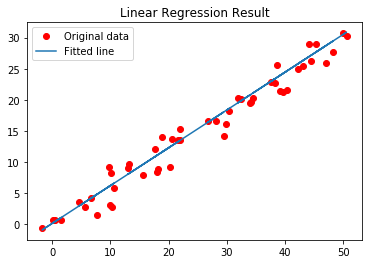

In [20]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 